### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.12.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
trainX = trainX.astype('float32') / 255.0

testX = testX.astype('float32') / 255.0

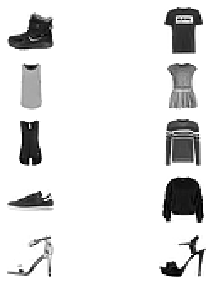

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Execute the model using model.fit()

In [61]:
trainX.shape


(60000, 28, 28)

In [67]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [78]:
  img_rows, img_cols = 28, 28
  
  trainX = trainX.reshape(trainX.shape[0], img_rows, img_cols, 1)
  testX = testX.reshape(testX.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)


print('x_train shape:', trainX.shape)
print(trainX.shape[0], 'train samples')
print(testX.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [82]:
model.fit(trainX, trainY,
          batch_size=128,
          epochs=5,
          validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.6464 - acc: 0.7542 - val_loss: 0.5730 - val_acc: 0.7899
Epoch 2/5
60000/60000 [==============================] - 111s 2ms/step - loss: 0.6311 - acc: 0.7606 - val_loss: 0.5686 - val_acc: 0.7882
Epoch 3/5
60000/60000 [==============================] - 109s 2ms/step - loss: 0.6184 - acc: 0.7669 - val_loss: 0.5472 - val_acc: 0.8002
Epoch 4/5
60000/60000 [==============================] - 107s 2ms/step - loss: 0.6114 - acc: 0.7684 - val_loss: 0.5364 - val_acc: 0.8017
Epoch 5/5
60000/60000 [==============================] - 106s 2ms/step - loss: 0.6014 - acc: 0.7725 - val_loss: 0.5276 - val_acc: 0.8079


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [84]:
model.add(tf.keras.layers.BatchNormalization())
model.fit(trainX, trainY,
          batch_size=128,
          epochs=5,
          validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 123s 2ms/step - loss: 8.9361 - acc: 0.1484 - val_loss: 11.4589 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 115s 2ms/step - loss: 5.3955 - acc: 0.1353 - val_loss: 6.1715 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 120s 2ms/step - loss: 6.6138 - acc: 0.1083 - val_loss: 10.2732 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 119s 2ms/step - loss: 8.7031 - acc: 0.1027 - val_loss: 5.7746 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 119s 2ms/step - loss: 11.1600 - acc: 0.0999 - val_loss: 11.2827 - val_acc: 0.1000


### Execute the model

In [85]:
score = model.evaluate(testX, testY)

10000/10000 [==============================] - 4s 409us/step


### Customize the learning rate to 0.001 in sgd optimizer and run the model

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

## Review model

### Run the model